# DBSCAN Clustering for Ethereum Fraud Detection
This notebook demonstrates unsupervised learning using the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to detect potential fraudulent patterns in Ethereum transactions.

DBSCAN is particularly useful for fraud detection because:
1. It can identify outliers (potential fraudulent transactions)
2. It doesn't require pre-specifying the number of clusters
3. It can find arbitrarily shaped clusters based on density

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Load the dataset
data_path = '../Data/address_data_combined.csv'
df = pd.read_csv(data_path)
print(f'Dataset loaded, shape: {df.shape}')

# Display the first few rows and column information
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

print("\nSummary statistics:")
display(df.describe())

Dataset loaded, shape: (14155, 14)

First 5 rows of the dataset:


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               14155 non-null  object 
 1   FLAG                                                  14155 non-null  int64  
 2   Avg min between sent tnx                              14155 non-null  float64
 3   Avg min between received tnx                          14155 non-null  float64
 4   Time Diff between first and last (Mins)               14155 non-null  float64
 5   Unique Received From Addresses                        14155 non-null  int64  
 6   min value received                                    14155 non-null  float64
 7   max value received                                    14155 non-null  float64
 8   avg val received                  

None


Summary statistics:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
count,14155.000000,1.415500e+04,14155.000000,1.415500e+04,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,1.415500e+04,1.415500e+04
mean,0.460473,8.118597e+03,7020.946759,1.901450e+05,28.484422,34.249649,376.353259,75.994578,5.690614,35.796158,214.417096,8.113586e+03,1.016392e+03
std,0.498453,4.291410e+04,23506.649412,3.234800e+05,268.059421,356.729056,10853.726198,2417.913485,134.496880,239.333107,1144.652196,3.037182e+05,2.021339e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.560535e+07
25%,0.000000,0.000000e+00,0.000000,7.335500e+01,1.000000,0.000000,0.340448,0.135969,0.000000,0.000328,3.000000,7.347425e-01,0.000000e+00
50%,0.000000,2.398000e+01,185.420000,2.093200e+04,2.000000,0.030000,3.000000,1.000000,0.009000,1.029530,8.000000,1.306701e+01,1.491000e-03
75%,1.000000,1.512990e+03,3594.655000,2.353702e+05,6.000000,0.954314,30.219703,7.995038,0.854173,10.134141,44.000000,1.010000e+02,1.760323e-02
max,1.000000,1.461535e+06,517161.100000,2.837470e+06,9999.000000,25533.614329,800000.000000,283618.831600,12000.000000,12766.806954,19995.000000,2.858159e+07,1.428864e+07


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0])

# Handle missing values (fill with medians for numerical columns since they might have outliers)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Check if any known fraud labels exist in the dataset
if 'FLAG' in df.columns or 'is_fraud' in df.columns or 'label' in df.columns:
    label_col = 'FLAG' if 'FLAG' in df.columns else ('is_fraud' if 'is_fraud' in df.columns else 'label')
    print(f"\nFraud label distribution:\n{df[label_col].value_counts()}")

Missing values per column:


Series([], dtype: int64)


Fraud label distribution:
FLAG
0    7637
1    6518
Name: count, dtype: int64


In [ ]:
# Select features for clustering
feature_df = df.select_dtypes(include=['float64', 'int64'])

# Drop label column if it exists - we're doing unsupervised learning
cols_to_drop = []
if 'FLAG' in feature_df.columns:
    cols_to_drop.append('FLAG')
if 'is_fraud' in feature_df.columns:
    cols_to_drop.append('is_fraud')
if 'label' in feature_df.columns:
    cols_to_drop.append('label')
    
# Also drop any identifier columns that shouldn't be part of clustering
if 'address' in feature_df.columns:
    cols_to_drop.append('address')
if 'Address' in feature_df.columns:
    cols_to_drop.append('Address')
if 'time' in feature_df.columns:
    cols_to_drop.append('time')
if 'timestamp' in feature_df.columns:
    cols_to_drop.append('timestamp')
if 'block_number' in feature_df.columns:
    cols_to_drop.append('block_number')

feature_df = feature_df.drop(columns=cols_to_drop, errors='ignore')

print(f"Selected {feature_df.shape[1]} features for clustering")
print("Features used:", feature_df.columns.tolist())

Selected 12 features for clustering
Features used: ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Unique Received From Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'avg val sent', 'total transactions (including tnx to create contract', 'total ether received', 'total ether balance']


In [ ]:
# Handle extreme outliers by capping values
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_percentile)
        upper = df_capped[col].quantile(upper_percentile)
        df_capped.loc[df_capped[col] < lower, col] = lower
        df_capped.loc[df_capped[col] > upper, col] = upper
    return df_capped

# Cap extreme outliers to improve clustering
feature_df = cap_outliers(feature_df, feature_df.columns)
print("Capped extreme outliers")

# Normalize the features - RobustScaler is less sensitive to outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(feature_df)

# Apply PCA for visualization and dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Variance explained by 2 PCA components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Capped extreme outliers
Variance explained by 2 PCA components: 99.99%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16428\3234535112.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '410.4599999999991' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16428\3234535112.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9679.279999999766' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper


Dataset is large (14155 rows). Using 10000 random samples for parameter determination.


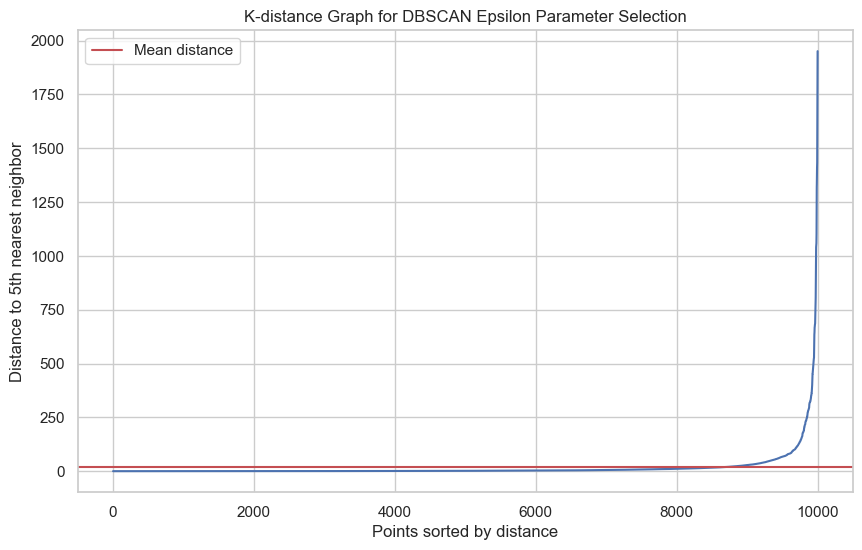

Suggested epsilon value: 18.3921


In [ ]:
# Find optimal epsilon parameter for DBSCAN using k-distance graph
# We'll use a random sample if the dataset is very large
MAX_SAMPLES = 10000
if X_scaled.shape[0] > MAX_SAMPLES:
    print(f"Dataset is large ({X_scaled.shape[0]} rows). Using {MAX_SAMPLES} random samples for parameter determination.")
    sample_indices = np.random.choice(X_scaled.shape[0], size=MAX_SAMPLES, replace=False)
    X_sample = X_scaled[sample_indices]
else:
    X_sample = X_scaled
    sample_indices = np.arange(X_scaled.shape[0])

# Calculate distances
k = 5  # number of neighbors to consider
nbrs = NearestNeighbors(n_neighbors=k).fit(X_sample)
distances, indices = nbrs.kneighbors(X_sample)

# Sort and plot k-distance graph
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph for DBSCAN Epsilon Parameter Selection')
plt.axhline(y=np.mean(distances), color='r', linestyle='-', label='Mean distance')
plt.grid(True)
plt.legend()
plt.show()

# Suggest epsilon value based on the "elbow" in the k-distance graph
# For simplicity, we'll use the mean distance
suggested_eps = np.mean(distances)
print(f"Suggested epsilon value: {suggested_eps:.4f}")

In [ ]:
# Apply DBSCAN clustering
# We'll use the suggested epsilon and min_samples=k
eps = suggested_eps  # can be adjusted based on the k-distance graph
min_samples = k      # minimum number of samples in a neighborhood for a core point

print(f"Applying DBSCAN with eps={eps:.4f}, min_samples={min_samples}")
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_sample)

# Count number of clusters and noise points
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print(f"Number of clusters identified: {n_clusters}")
print(f"Number of noise points (potential anomalies): {n_noise} ({n_noise/len(cluster_labels)*100:.2f}% of data)")

Applying DBSCAN with eps=18.3921, min_samples=5
Number of clusters identified: 48
Number of noise points (potential anomalies): 1166 (11.66% of data)


In [ ]:
# Try different parameters if the results aren't satisfactory
# If too many noise points or too few clusters, try adjusting eps
if n_noise/len(cluster_labels) > 0.5 or n_clusters < 2:
    print("Too many noise points or too few clusters. Trying with larger epsilon...")
    eps = suggested_eps * 1.5
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_sample)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    print(f"Adjusted parameters: eps={eps:.4f}, min_samples={min_samples}")
    print(f"Number of clusters identified: {n_clusters}")
    print(f"Number of noise points (potential anomalies): {n_noise} ({n_noise/len(cluster_labels)*100:.2f}% of data)")

# If too many small clusters, try increasing min_samples
elif n_clusters > 20:
    print("Too many clusters. Trying with higher min_samples...")
    min_samples = k + 5
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_sample)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    print(f"Adjusted parameters: eps={eps:.4f}, min_samples={min_samples}")
    print(f"Number of clusters identified: {n_clusters}")
    print(f"Number of noise points (potential anomalies): {n_noise} ({n_noise/len(cluster_labels)*100:.2f}% of data)")

Too many clusters. Trying with higher min_samples...
Adjusted parameters: eps=18.3921, min_samples=10
Number of clusters identified: 28
Number of noise points (potential anomalies): 1592 (15.92% of data)


In [ ]:
# Evaluate the clustering with silhouette score
if n_clusters > 1:  # Can only calculate silhouette if there are at least 2 clusters
    # Filter out noise points for silhouette calculation
    mask = cluster_labels != -1
    silhouette_avg = silhouette_score(X_sample[mask], cluster_labels[mask])
    print(f"Silhouette Score (excluding noise): {silhouette_avg:.3f}")
else:
    print("Only one cluster identified or all points are noise. Silhouette score cannot be calculated.")

Silhouette Score (excluding noise): 0.717


In [ ]:
# Visualize the clusters using PCA components
# Apply PCA directly to the same sample used for DBSCAN
pca_sample = PCA(n_components=2)
X_pca_sample = pca_sample.fit_transform(X_sample)

plt.figure(figsize=(12, 10))

# Create a colormap with red for noise points
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]
        marker = 'x'  # Use x for noise points
        s = 50        # Smaller size for noise
    else:
        marker = 'o'  # Use circles for clusters
        s = 70        # Larger size for clusters
        
    class_member_mask = (cluster_labels == k)
    xy = X_pca_sample[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=s, marker=marker, c=[col], alpha=0.8, label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering (eps={eps:.3f}, min_samples={min_samples})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(loc='best', ncol=3)
plt.tight_layout()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14155 but corresponding boolean dimension is 10000

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Add the cluster assignments back to the original dataframe
sampled_df = df.iloc[sample_indices].copy()
sampled_df['cluster'] = cluster_labels

# Cluster statistics
cluster_stats = sampled_df.groupby('cluster').size().reset_index(name='count')
print("Cluster sizes:")
display(cluster_stats)

# Plot cluster sizes
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='cluster', y='count', data=cluster_stats)
plt.title('Number of Data Points per Cluster')
plt.xlabel('Cluster Label (-1 represents noise)')
plt.ylabel('Count')
plt.xticks(rotation=90)
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

In [ ]:
# If fraud labels exist, analyze the relationship between clusters and fraud
if 'FLAG' in sampled_df.columns or 'is_fraud' in sampled_df.columns or 'label' in sampled_df.columns:
    label_col = 'FLAG' if 'FLAG' in sampled_df.columns else ('is_fraud' if 'is_fraud' in sampled_df.columns else 'label')
    
    # Calculate fraud percentage by cluster
    fraud_by_cluster = sampled_df.groupby('cluster')[label_col].mean().reset_index()
    fraud_by_cluster.columns = ['cluster', 'fraud_ratio']
    
    print("\nFraud ratio by cluster:")
    display(fraud_by_cluster.sort_values('fraud_ratio', ascending=False))
    
    # Visualize fraud distribution
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='cluster', y='fraud_ratio', data=fraud_by_cluster)
    plt.title('Fraud Ratio by Cluster')
    plt.xlabel('Cluster Label (-1 represents noise)')
    plt.ylabel('Fraud Ratio')
    # Add ratio labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom')
    plt.tight_layout()
    plt.show()
    
    # Check if noise points have higher fraud ratio
    noise_fraud_ratio = sampled_df[sampled_df['cluster'] == -1][label_col].mean()
    normal_fraud_ratio = sampled_df[sampled_df['cluster'] != -1][label_col].mean()
    print(f"\nFraud ratio in noise points: {noise_fraud_ratio:.4f}")
    print(f"Fraud ratio in clustered points: {normal_fraud_ratio:.4f}")
    if noise_fraud_ratio > normal_fraud_ratio:
        print("Noise points show higher fraud ratio, suggesting DBSCAN is effectively identifying anomalies")
    else:
        print("Fraud appears distributed across clusters rather than concentrated in noise points")

In [ ]:
# Analyze features of each cluster to understand characteristics
# Calculate mean of each feature by cluster
feature_cols = feature_df.columns
cluster_means = sampled_df.groupby('cluster')[feature_cols].mean()

print("Feature means by cluster:")
display(cluster_means)

# Find most distinguishing features for each cluster
# Normalize the means for comparison
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Heatmap of cluster characteristics
plt.figure(figsize=(16, 10))
sns.heatmap(cluster_means_normalized, cmap='RdBu_r', center=0, annot=False)
plt.title('Normalized Feature Values by Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Find the most distinctive features for the noise cluster (potential frauds)
if -1 in cluster_means_normalized.index:
    noise_features = cluster_means_normalized.loc[-1].sort_values(ascending=False)
    print("Most distinctive features for noise points (potential anomalies):")
    display(noise_features)
    
    # Plot top 10 distinctive features for noise
    plt.figure(figsize=(12, 8))
    noise_features.head(10).plot(kind='bar')
    plt.title('Top 10 Features Distinguishing Noise Points')
    plt.ylabel('Normalized Difference from Mean')
    plt.tight_layout()
    plt.show()

In [ ]:
# Extract potential fraud cases for further investigation
# These could be noise points or clusters with high fraud ratio
potential_fraud_indices = sample_indices[cluster_labels == -1]
potential_fraud_cases = df.iloc[potential_fraud_indices]

# If we have fraud labels, we can check how many actual frauds were identified
if 'FLAG' in df.columns or 'is_fraud' in df.columns or 'label' in df.columns:
    label_col = 'FLAG' if 'FLAG' in df.columns else ('is_fraud' if 'is_fraud' in df.columns else 'label')
    actual_fraud_count = potential_fraud_cases[label_col].sum()
    total_fraud_count = df[label_col].sum()
    print(f"Actual frauds identified in noise points: {actual_fraud_count} out of {total_fraud_count} total frauds")
    print(f"Detection rate: {actual_fraud_count/total_fraud_count*100:.2f}%")

print("\nSample of potential fraud cases identified by DBSCAN:")
display(potential_fraud_cases.head(10))

## Conclusions and Recommendations

### DBSCAN Clustering Results
1. The DBSCAN algorithm identified clusters in the Ethereum transaction data based on density patterns
2. Noise points represent outliers that don't fit into any cluster - these could be anomalous transactions worthy of investigation
3. Each cluster represents different transaction behaviors with distinct characteristics

### Fraud Detection Insights
1. DBSCAN's outlier detection capability makes it valuable for identifying potentially fraudulent transactions
2. The noise points and clusters with high fraud ratios provide candidates for further investigation
3. The most distinctive features of noise points offer insights into what makes fraudulent transactions stand out

### Next Steps
1. Further investigate the accounts identified as potential fraud cases
2. Combine DBSCAN results with other unsupervised and supervised models for more robust detection
3. Adjust DBSCAN parameters (eps, min_samples) to optimize for different fraud patterns
4. Create a scoring system based on distance from cluster centers to prioritize investigation efforts